In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
# Constants
agent_name = "h1"
model_name = "debugged_test_longer"

In [3]:
# All possible features
all_direction_features = np.array(
    [
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 1, 1],
        [1, 1, 1, 1],
        [0, 0, 0, 2],
        [0, 0, 1, 2],
        [0, 1, 1, 2],
        [1, 1, 1, 2],
        [0, 0, 2, 2],
        [0, 1, 2, 2],
        [1, 1, 2, 2],
        [0, 2, 2, 2],
        [1, 2, 2, 2],
        [2, 2, 2, 2],   
    ]
)
all_own_spot_features  = np.array([0, 1, 2])
all_mode_features      = np.array([0, 1])  

### Evaluating the trained model

In [4]:
trained_model = np.load(f"model_{agent_name}_{model_name}.pt", allow_pickle = True)
policy        = np.argmax(trained_model, axis = -1)

In [5]:
def look_up_q_tensor(f5, f6):
    print(f"Q-Tensor for case f5 = {f5}, f6 = {f6}:")
    print("state  direction features   policy  trained model")
    for i in range(len(all_direction_features)):
        line = f"{i:2}{'':5}{all_direction_features[i]}{'':12}{policy[i, f5, f6]}{'':7}["
        for Q_value in trained_model[i, f5, f6]:
            line += f"{Q_value:-7.3f}"
        line += "]"
        print(line)

In [6]:
look_up_q_tensor(0, 0)

Q-Tensor for case f5 = 0, f6 = 0:
state  direction features   policy  trained model
 0     [0 0 0 0]            4       [ -0.000 -0.000 -0.000 -0.000 -0.000 -0.000]
 1     [0 0 0 1]            3       [ -0.000 -0.000 -0.000  0.000 -0.000 -0.000]
 2     [0 0 1 1]            3       [ -0.000 -0.000  0.000  0.000  0.000  0.000]
 3     [0 1 1 1]            2       [  0.000  0.000  0.000  0.000 -0.000  0.000]
 4     [1 1 1 1]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 5     [0 0 0 2]            3       [ -0.000 -0.000 -0.000  0.543 -0.000 -0.000]
 6     [0 0 1 2]            3       [ -0.000 -0.000 -0.000  0.353 -0.000 -0.000]
 7     [0 1 1 2]            3       [  0.000  0.000 -0.000  0.317 -0.000  0.000]
 8     [1 1 1 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 9     [0 0 2 2]            2       [  0.000 -0.000  0.000  0.000 -0.000  0.000]
10     [0 1 2 2]            1       [  0.000  0.000  0.000 -0.000  0.000  0.000]
11     [1 1 2 2]         

In [7]:
look_up_q_tensor(1, 0)

Q-Tensor for case f5 = 1, f6 = 0:
state  direction features   policy  trained model
 0     [0 0 0 0]            4       [  0.000  0.000  0.000  0.000 53.127  1.628]
 1     [0 0 0 1]            3       [  0.000  0.000  0.000 52.429  0.000  0.000]
 2     [0 0 1 1]            3       [  0.000  0.000  0.000 30.889  0.000  0.000]
 3     [0 1 1 1]            2       [  0.000  1.580 51.895  0.020  0.000  0.048]
 4     [1 1 1 1]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 5     [0 0 0 2]            3       [  0.001  0.000  3.849 54.985  0.010  0.000]
 6     [0 0 1 2]            3       [ 10.579  4.744  6.309 55.912  3.823  4.331]
 7     [0 1 1 2]            3       [  1.451  1.483  2.020 55.584  3.367  0.135]
 8     [1 1 1 2]            3       [  6.078  1.462  6.507 56.464  5.209  0.009]
 9     [0 0 2 2]            2       [  0.000  0.000 34.182  0.000  0.000  0.000]
10     [0 1 2 2]            2       [  0.000  0.001 52.171  0.047  2.135  0.557]
11     [1 1 2 2]         

In [8]:
look_up_q_tensor(2, 0)

Q-Tensor for case f5 = 2, f6 = 0:
state  direction features   policy  trained model
 0     [0 0 0 0]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 1     [0 0 0 1]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 2     [0 0 1 1]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 3     [0 1 1 1]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 4     [1 1 1 1]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 5     [0 0 0 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 6     [0 0 1 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 7     [0 1 1 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 8     [1 1 1 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 9     [0 0 2 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
10     [0 1 2 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
11     [1 1 2 2]         

In [9]:
look_up_q_tensor(0, 1)

Q-Tensor for case f5 = 0, f6 = 1:
state  direction features   policy  trained model
 0     [0 0 0 0]            4       [ -0.000 -0.000 -0.000 -0.005 -0.000 -0.000]
 1     [0 0 0 1]            3       [ -0.000 -0.000 -0.000 47.812 -0.000 -0.000]
 2     [0 0 1 1]            3       [ -0.000 -0.000  0.000 25.962 -0.000 -0.000]
 3     [0 1 1 1]            3       [  0.000  0.000  0.000  0.000 -0.000  0.000]
 4     [1 1 1 1]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 5     [0 0 0 2]            3       [ -0.000 -0.000 -0.000 51.444 -0.000 -0.022]
 6     [0 0 1 2]            2       [ -0.003 -0.000 24.469  0.000 -0.000 -0.000]
 7     [0 1 1 2]            2       [  0.000 -0.000  0.000  0.000 -0.000  0.000]
 8     [1 1 1 2]            0       [  0.000  0.000  0.000  0.000 -0.000 -0.000]
 9     [0 0 2 2]            2       [ -0.000 -0.000  0.806  0.000 -0.000 -0.000]
10     [0 1 2 2]            2       [  0.000  0.000  0.000  0.000 -0.000  0.000]
11     [1 1 2 2]         

In [10]:
look_up_q_tensor(1, 1)

Q-Tensor for case f5 = 1, f6 = 1:
state  direction features   policy  trained model
 0     [0 0 0 0]            5       [  0.000  0.000  0.000  0.000  0.000  6.518]
 1     [0 0 0 1]            3       [  0.000  0.000  0.000 31.071  0.000  0.000]
 2     [0 0 1 1]            2       [  0.000 -0.000  0.410  0.000  0.000 -0.000]
 3     [0 1 1 1]            3       [ -0.000  0.000  0.000 17.751  0.000  0.000]
 4     [1 1 1 1]            3       [  0.000  0.000  0.000  0.000  0.000  0.000]
 5     [0 0 0 2]            3       [  5.398  2.611  2.052 52.890  7.737  4.998]
 6     [0 0 1 2]            3       [  1.852  7.970  0.981 48.813  3.427  3.484]
 7     [0 1 1 2]            3       [  0.041  0.144  0.002 49.781  0.279  0.003]
 8     [1 1 1 2]            3       [  0.569  0.253  0.123 47.058  2.917  1.030]
 9     [0 0 2 2]            2       [  0.000  0.000 42.404  0.001  0.000 -0.000]
10     [0 1 2 2]            2       [  0.000  1.365 49.737  0.000  5.063 -0.000]
11     [1 1 2 2]         

In [11]:
look_up_q_tensor(2, 1)

Q-Tensor for case f5 = 2, f6 = 1:
state  direction features   policy  trained model
 0     [0 0 0 0]            4       [  0.000  0.000  0.725  0.000 46.989  0.000]
 1     [0 0 0 1]            5       [  0.000  3.633  0.000  0.034  0.000 49.408]
 2     [0 0 1 1]            5       [  3.606  0.894  0.367  0.000  0.021 49.498]
 3     [0 1 1 1]            5       [  0.000  0.000  0.098  0.000  0.000 49.314]
 4     [1 1 1 1]            5       [  0.000  0.014  0.320  0.000  0.023 30.560]
 5     [0 0 0 2]            5       [  0.000 -0.000  0.000 -0.000  0.000  3.419]
 6     [0 0 1 2]            5       [ -0.000  2.330  0.000  0.000  0.000 13.238]
 7     [0 1 1 2]            2       [  0.000  0.000  0.459  0.000  0.000 -0.000]
 8     [1 1 1 2]            5       [  0.000  0.000  0.000  0.000  0.000  0.015]
 9     [0 0 2 2]            5       [  0.000  0.000  0.000  0.000  0.000  0.000]
10     [0 1 2 2]            2       [  0.000  0.000  0.000  0.000  0.000  0.000]
11     [1 1 2 2]         

## Looking at the training process

### Training performance over rounds

In [12]:
with open("results_train.json") as file:
    training_results = json.load(file)

In [13]:
number_of_rounds = training_results['by_agent'][f"agent_{agent_name}"]['rounds']

round_list      = list(training_results['by_round'])
rounds          = np.zeros(number_of_rounds)
collected_coins = np.zeros(number_of_rounds)
round_lengths   = np.zeros(number_of_rounds)
for i, round_name in enumerate(round_list):
    round              = training_results['by_round'][round_name]
    collected_coins[i] = round['coins']
    round_lengths[i]   = round['steps']
    rounds[i]          = round['round']

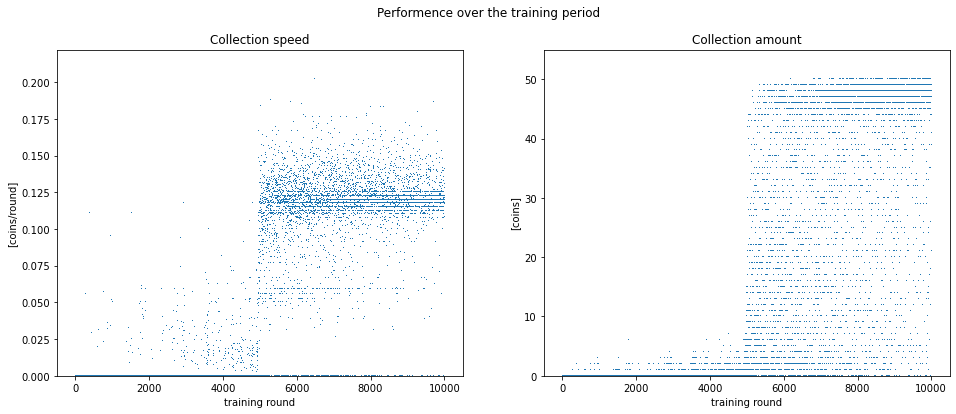

In [22]:
plt.figure(figsize = (16,6))
plt.suptitle("Performence over the training period")
plt.subplot(1, 2, 1)
speed = collected_coins / round_lengths
plt.plot(rounds, speed, ',')
plt.ylim((0, 1.1*max(speed)))
plt.title("Collection speed")
plt.ylabel("[coins/round]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.subplot(1, 2, 2)
plt.plot(rounds, collected_coins, ',')
plt.ylim((0, 1.1*max(collected_coins)))
plt.title("Collection amount")
plt.ylabel("[coins]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")
plt.show()

In [15]:
def analyze_state (state):
    state_index, f5, f6 = state
    Q_state = allQs[:, state_index, f5, f6, :]
    labels  = ["action 0", "action 1", "action 2", "action 3", "WAIT", "BOMB"]

    plt.plot(np.arange(number_of_rounds) + 1, Q_state, label = labels)
    plt.title(f"Evolution of state {state}")
    plt.ylabel("Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

### Evolution of the Q-model

In [16]:
allQs = np.load("Qtrain.npy")

for i in range(len(policy)):
    analyze_state(i)

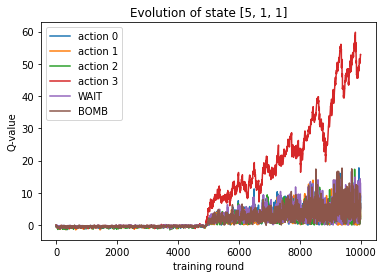

In [17]:
analyze_state([5,1,1])

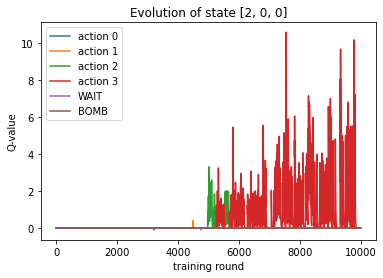

In [18]:
analyze_state([2,0,0])

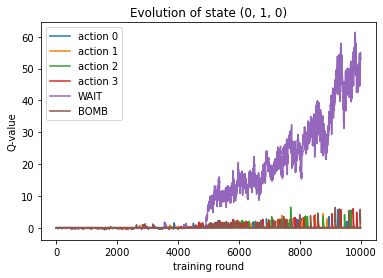

In [19]:
analyze_state((0,1,0))

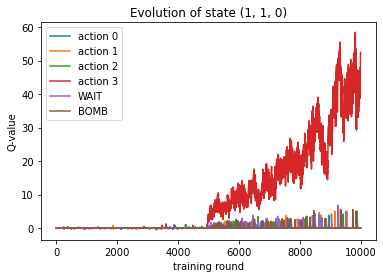

In [20]:
analyze_state((1,1,0))

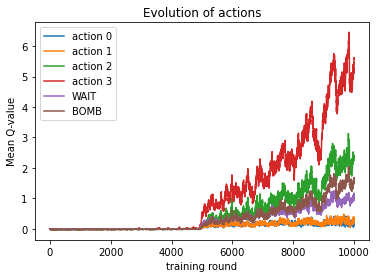

In [21]:
def analyze_action():
    Q_action = np.mean(allQs, axis = (1,2,3))
    labels  = ["action 0", "action 1", "action 2", "action 3", "WAIT", "BOMB"]

    plt.plot(np.arange(number_of_rounds) + 1, Q_action, label = labels)
    plt.title(f"Evolution of actions")
    plt.ylabel("Mean Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

analyze_action()